In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# DATA PREPROCESSING

In [ ]:
train = pd.read_csv(r'/content/customer_behavior_train.csv')
test  = pd.read_csv(r'/content/customer_behavior_test.csv')

In [ ]:
train.head(5)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
0,2.29,5.37,1,10.00,Facebook,143.14,D,1
1,7.49,16.36,0,25.52,Instagram,136.66,A,1
2,5.71,13.69,0,10.00,Google,67.13,C,0
3,1.23,3.22,1,41.49,Google,92.12,C,0
4,3.55,10.72,0,21.57,Direct,70.31,B,0


In [ ]:
test.head(5)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
0,3.33,12.76,0,27.66,Google,131.60,C,0
1,3.75,10.20,0,15.05,Direct,41.63,C,0
2,6.55,16.40,0,105.27,Facebook,98.72,A,1
3,6.42,19.68,1,21.17,Direct,180.20,D,0
4,8.38,30.59,0,91.31,Instagram,58.70,B,1


In [ ]:
train.shape , test.shape

((1800, 8), (450, 8))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          1800 non-null   float64
 1   Pages_viewed          1800 non-null   float64
 2   Clicked_ad            1800 non-null   int64  
 3   Cart_value            1800 non-null   float64
 4   Referral              1800 non-null   object 
 5   Browser_Refresh_Rate  1800 non-null   float64
 6   Last_Ad_Seen          1800 non-null   object 
 7   Purchase              1800 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 112.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          450 non-null    float64
 1   Pages_viewed          450 non-null    float64
 2   Clicked_ad            450 non-null    int64  
 3   Cart_value            450 non-null    float64
 4   Referral              450 non-null    object 
 5   Browser_Refresh_Rate  450 non-null    float64
 6   Last_Ad_Seen          450 non-null    object 
 7   Purchase              450 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 28.3+ KB


conclusion:  no null values, since dataset is small so no need to change dtypes to float32

In [ ]:
train.describe()

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Purchase
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,4.962244,12.429483,0.301111,50.352933,100.662100,0.292222
std,2.336373,6.381941,0.458868,47.443390,51.645694,0.454910
min,0.500000,0.760000,0.000000,10.000000,-65.800000,0.000000
25%,3.300000,7.860000,0.000000,13.862500,65.430000,0.000000
50%,4.935000,12.020000,0.000000,34.690000,99.735000,0.000000
75%,6.610000,16.500000,1.000000,67.630000,134.755000,1.000000
max,10.000000,35.340000,1.000000,300.000000,303.400000,1.000000


In [ ]:
test.describe()

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Purchase
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.047133,12.800111,0.353333,52.160156,100.142622,0.302222
std,2.412017,6.987936,0.478537,47.486090,50.234428,0.459732
min,0.500000,0.580000,0.000000,10.000000,-38.790000,0.000000
25%,3.335000,7.622500,0.000000,15.135000,65.790000,0.000000
50%,5.010000,12.255000,0.000000,36.375000,102.360000,0.000000
75%,6.720000,16.767500,1.000000,70.055000,133.880000,1.000000
max,10.000000,36.900000,1.000000,290.990000,252.030000,1.000000


conclusion: there is skeweness in Cart_value

In [ ]:
len(train[train['Browser_Refresh_Rate']<0]), len(test[test['Browser_Refresh_Rate']<0])

(38, 14)

hmm... there are negative values probably errors in data we will se after training and evaluating then droping these entries retraining and re-evaluating if these entries are causing any problem

In [ ]:
train.duplicated().sum(), test.duplicated().sum()

(np.int64(0), np.int64(0))

<Axes: >

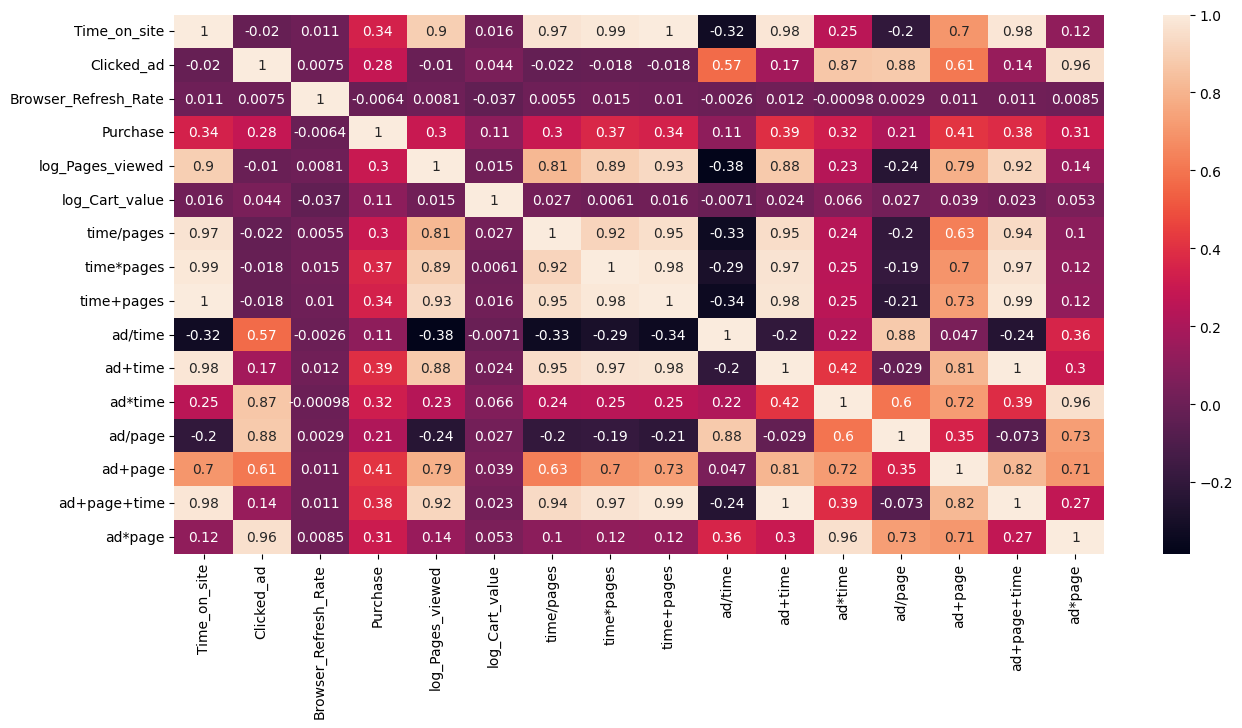

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(numeric_only=True),annot=True)

# **EDA**

## UNIVARIATE ANALYSIS

In [ ]:
num_cols = ['Time_on_site','Pages_viewed','Cart_value','Browser_Refresh_Rate']
cat_cols = ['Clicked_ad','Last_Ad_Seen','Referral']

<Axes: ylabel='count'>

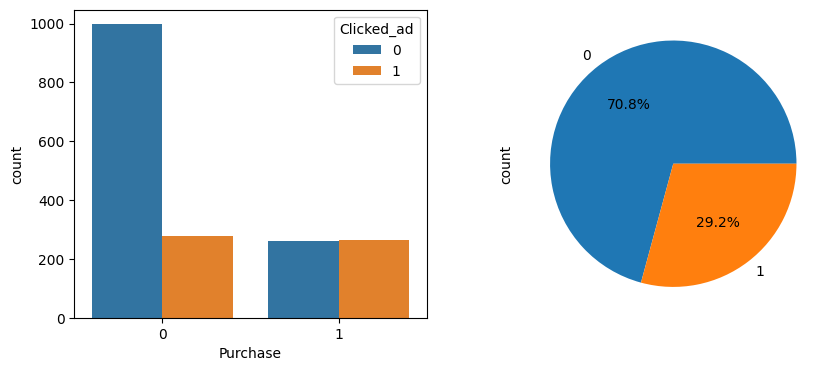

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x='Purchase',data=train,hue='Clicked_ad')

plt.subplot(1,2,2)
train['Purchase'].value_counts().plot.pie(autopct='%1.1f%%')


conclusion: Class imbalance in target column

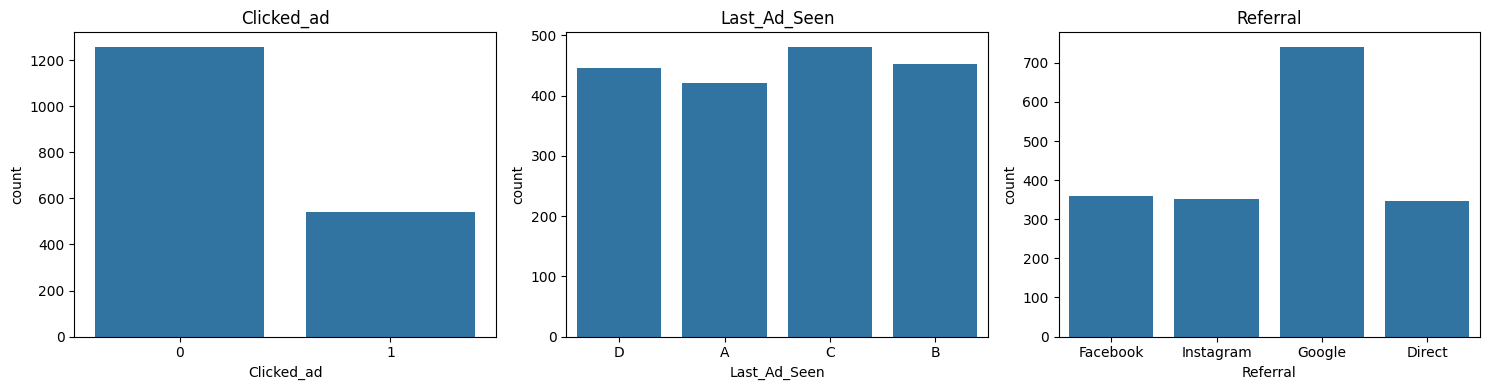

In [ ]:
ncols = 3
nrows = (len(cat_cols)//ncols)
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)


for i, col in enumerate(cat_cols):
    q,r = divmod(i,ncols)
    sns.countplot(x=col,data=train,ax=axis[q][r])
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

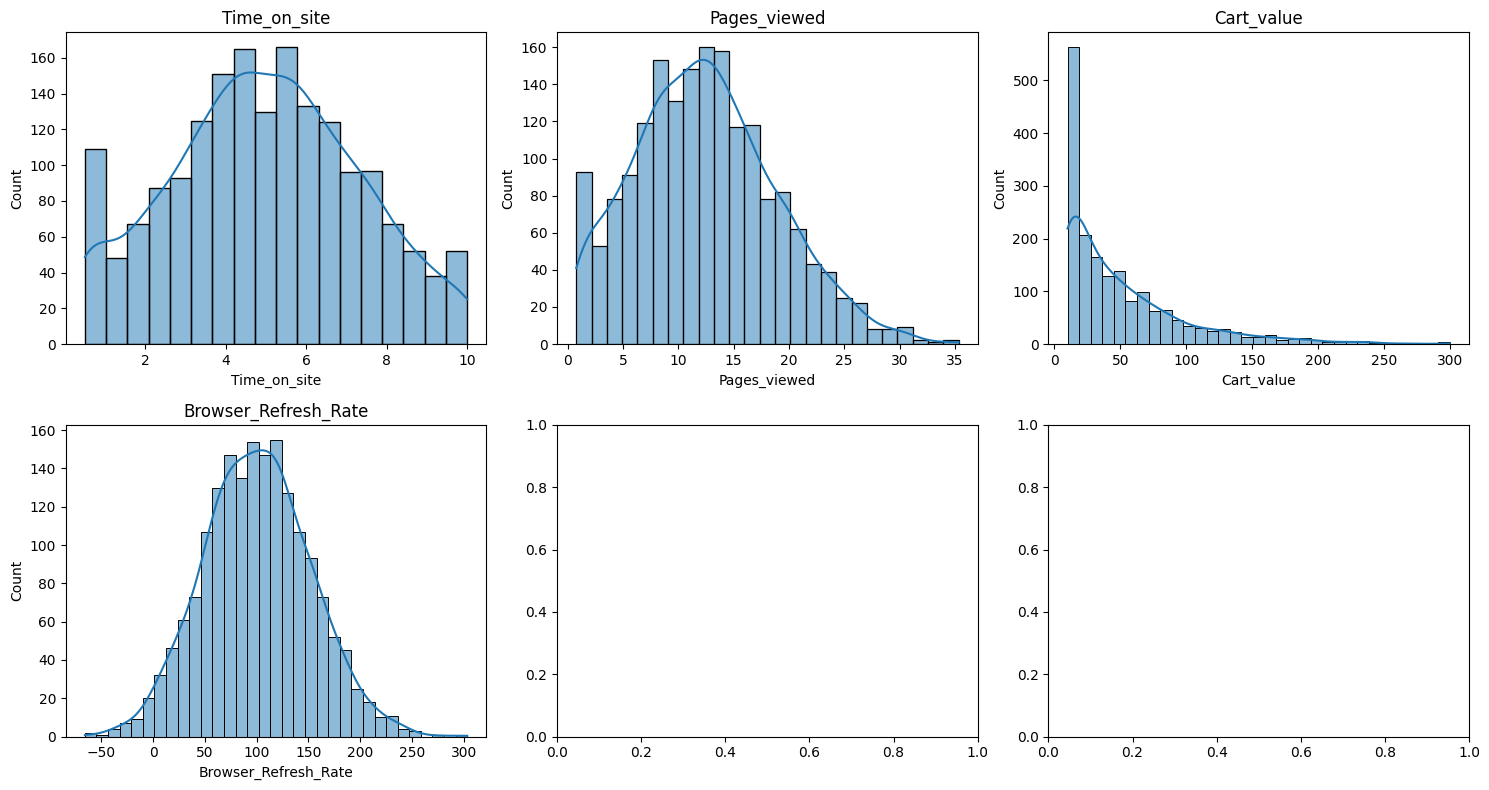

In [ ]:
ncols = 3
nrows = (len(num_cols)//ncols)+1
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)

for i, col in enumerate(num_cols):
    q,r = divmod(i,ncols)
    sns.histplot(train[col],ax=axis[q][r],kde=True)
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

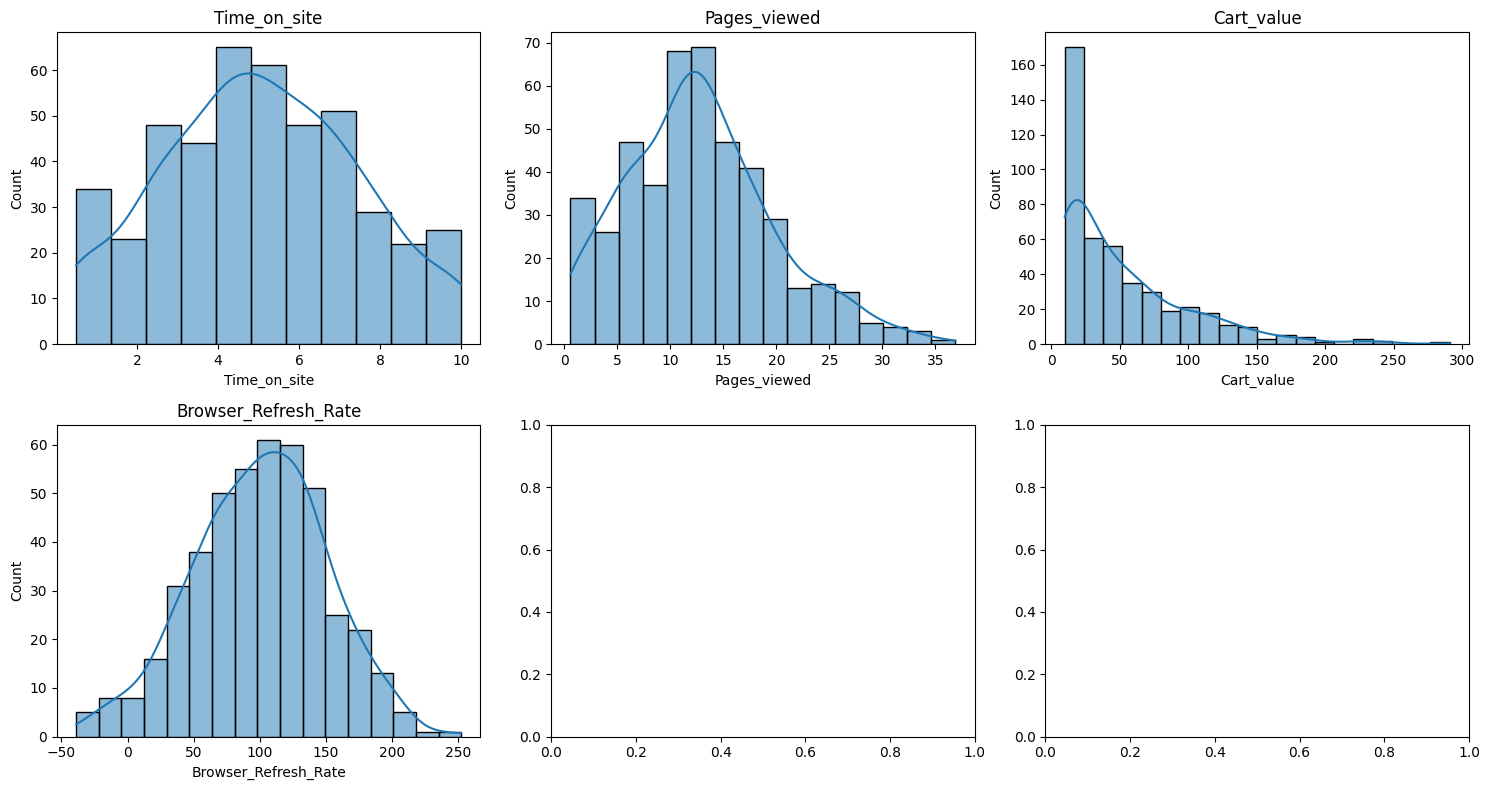

In [ ]:
ncols = 3
nrows = (len(num_cols)//ncols)+1
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)

for i, col in enumerate(num_cols):
    q,r = divmod(i,ncols)
    sns.histplot(test[col],ax=axis[q][r],kde=True)
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

conclusion: Right Skewness in Pages_viewed and heavy right Skewness in Cart_value & Negative values in Browser_Refresh_Rate.

--> log1p() on both right skewed feature and maybe clipping on Browser_Refresh_Rate

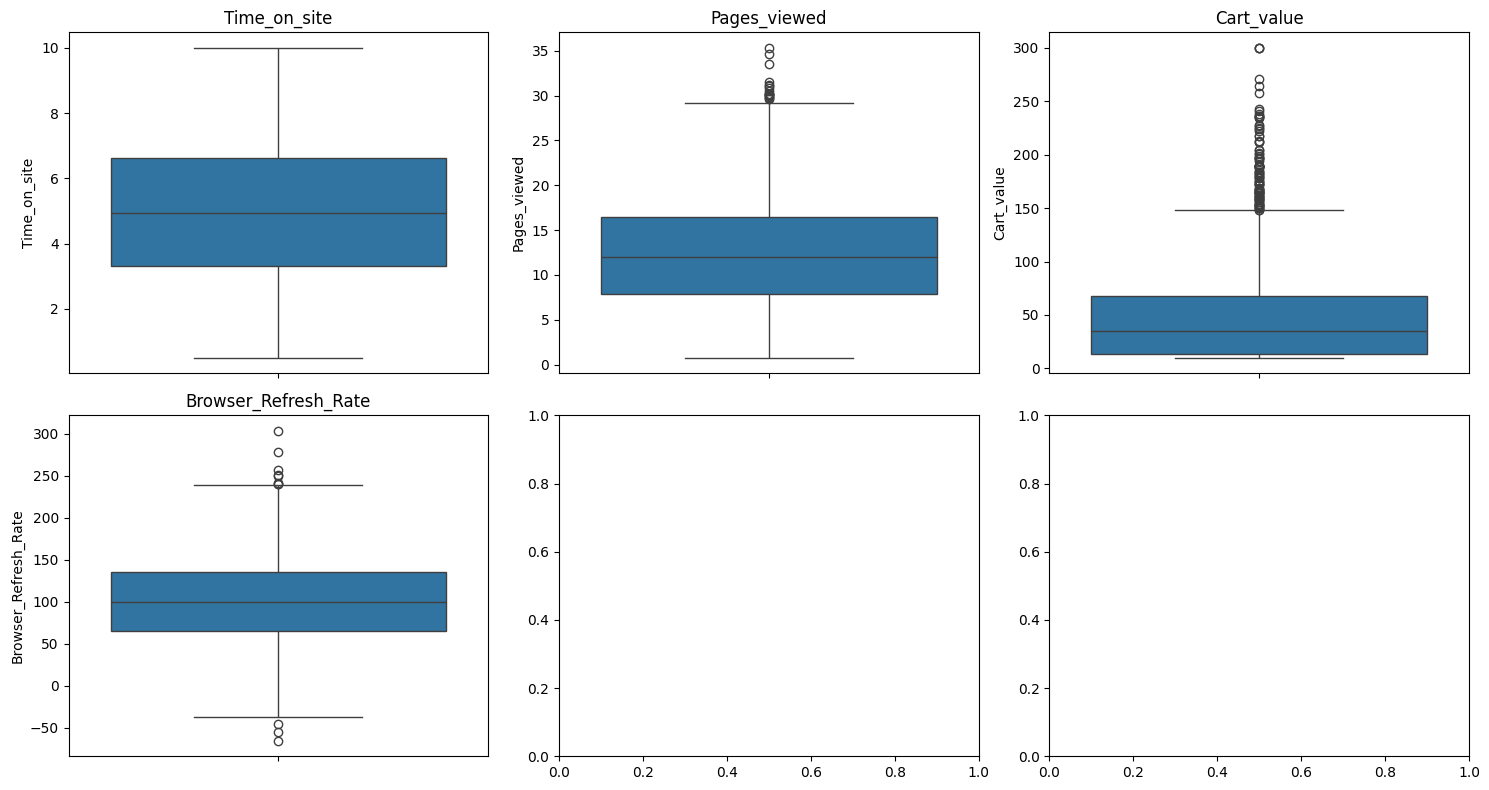

In [ ]:
ncols = 3
nrows = (len(num_cols)//ncols)+1
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)

for i, col in enumerate(num_cols):
    q,r = divmod(i,ncols)
    sns.boxplot(train[col],ax=axis[q][r])
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

conclusion: Outliers in Pages_viewed and Cart_value doesn't looks like error in data they looks legit. but in Browser_Refresh_Rate it has both positive and negative outliers.

## BIVARIATE ANALYSIS


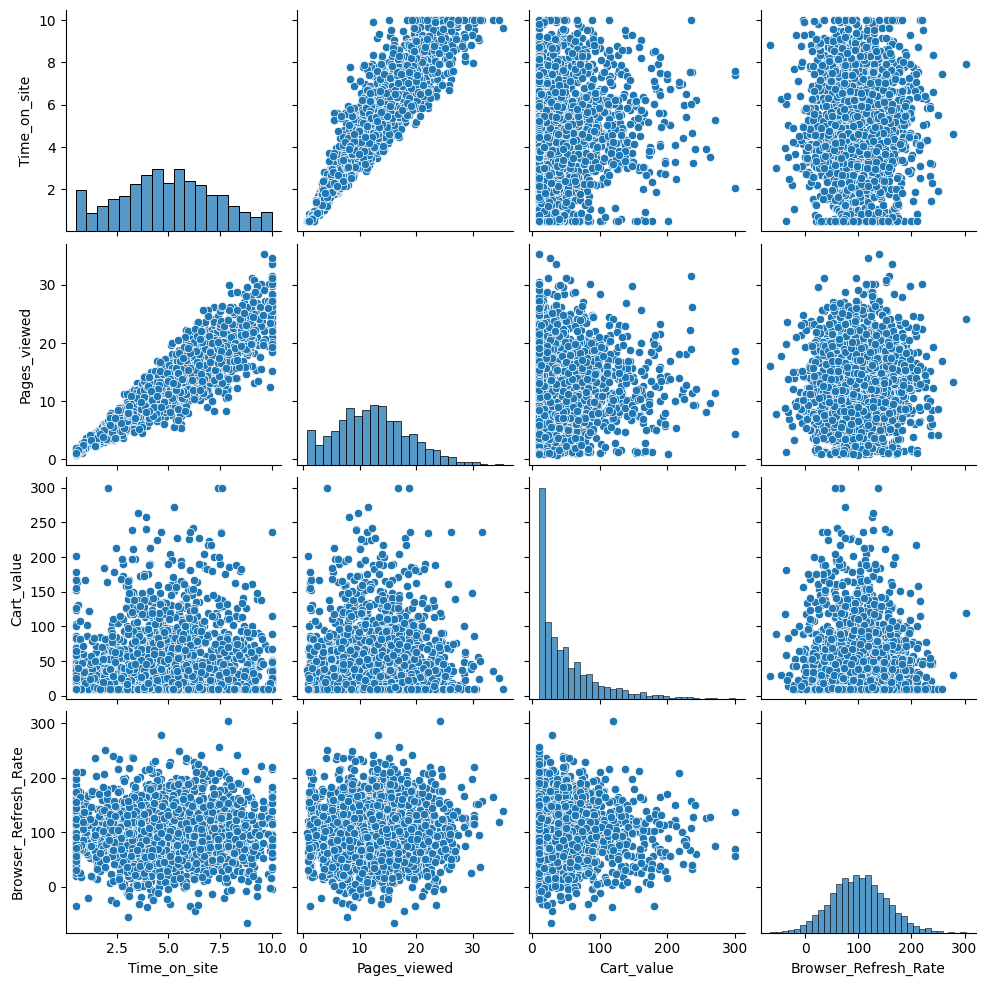

In [ ]:
sns.pairplot(train[num_cols])

conclusion: strong positive corr between Pages_viewed and Time_on_site, no clusters visible and maybe we need feature engg here

<Axes: >

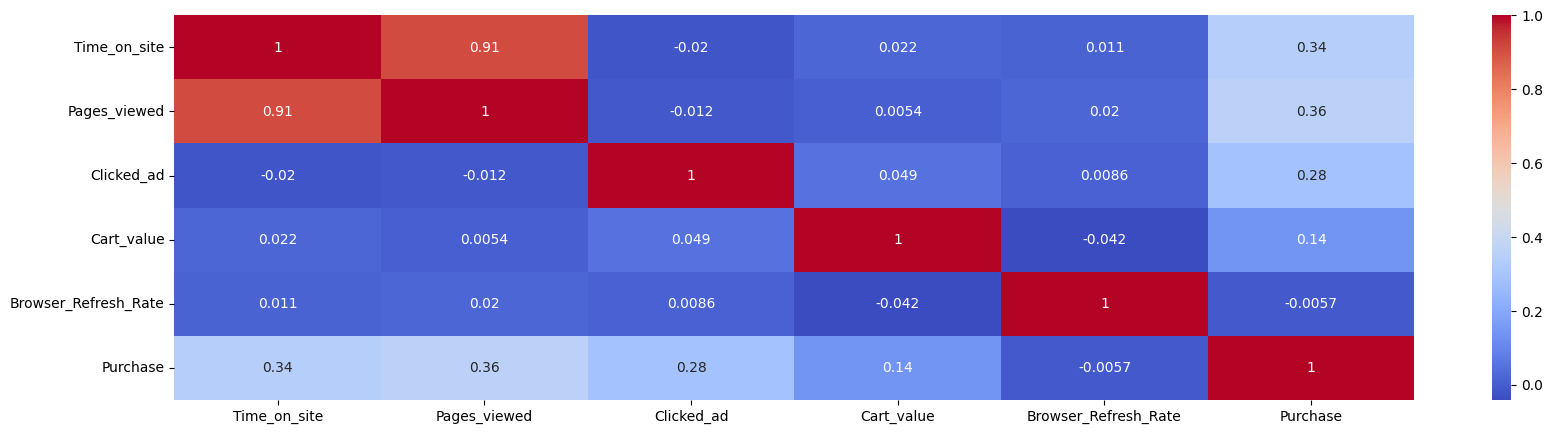

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(train.corr(numeric_only=True),cmap='coolwarm',annot=True)

Conclusion: Mulyi_collinearity between Pages_viewed and Clicked_ad. it can cause problem in linear models & maybe we can drop Browser_Refresh_Rate for linear models but again we will check feature importance after training model

## FEATURE ENGG

In [ ]:
train = pd.read_csv(r'/content/customer_behavior_train.csv')
test  = pd.read_csv(r'/content/customer_behavior_test.csv')

In [ ]:
# removing outliers
train['Browser_Refresh_Rate'] = train['Browser_Refresh_Rate'].clip(lower=0)
test['Browser_Refresh_Rate'] = test['Browser_Refresh_Rate'].clip(lower=0)
train['Browser_Refresh_Rate'] = train['Browser_Refresh_Rate'].clip(upper=250)
test['Browser_Refresh_Rate'] = test['Browser_Refresh_Rate'].clip(upper=250)


train['Cart_value'] = train['Cart_value'].clip(upper=200)
test['Cart_value'] = test['Cart_value'].clip(upper=200)

train['Pages_viewed'] = train['Pages_viewed'].clip(upper=30)
test['Pages_viewed'] = test['Pages_viewed'].clip(upper=30)

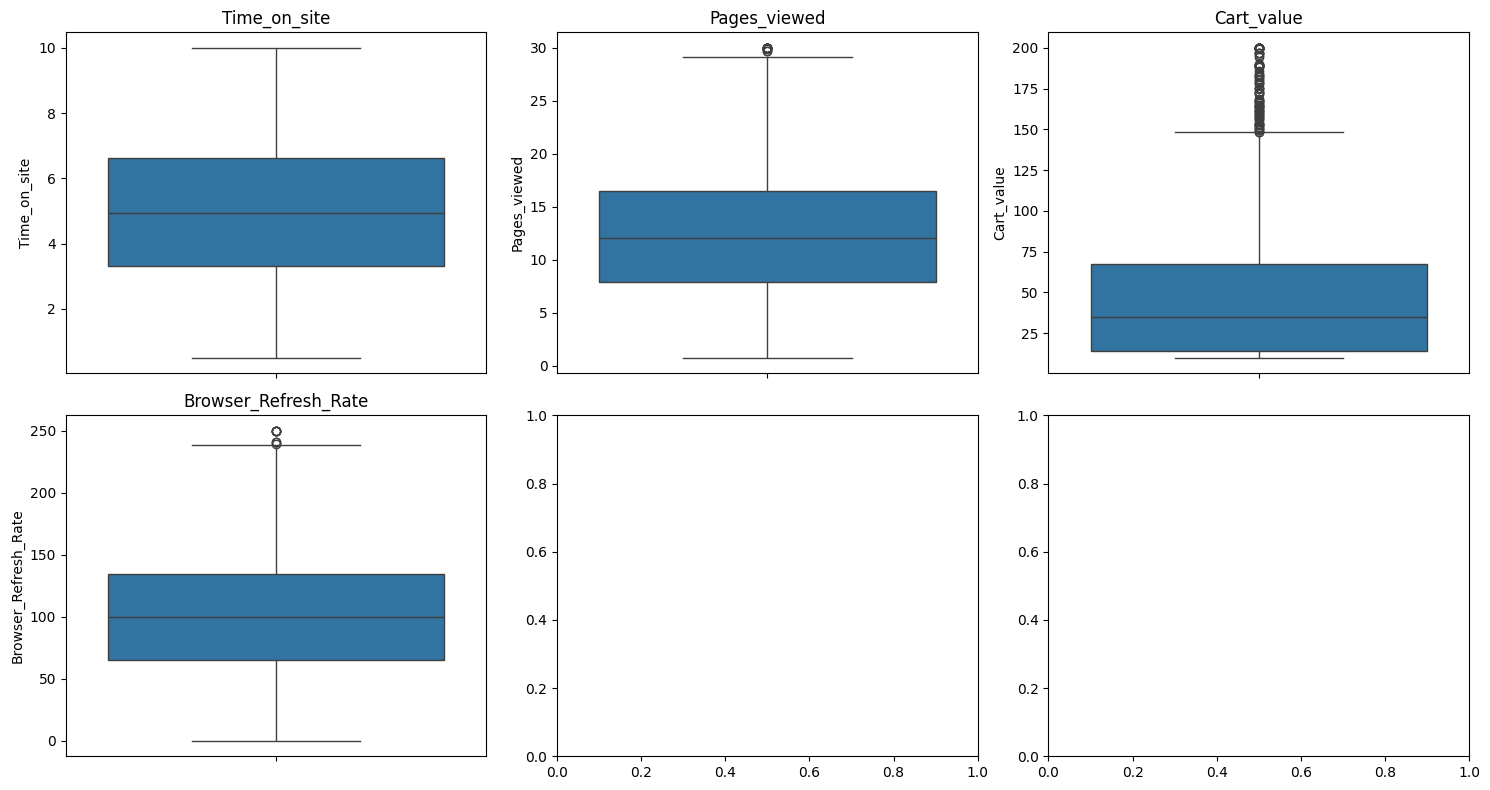

In [ ]:
ncols = 3
nrows = (len(num_cols)//ncols)+1
fig, axis= plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*5,nrows*4))
axis = np.array(axis).reshape(nrows,ncols)

for i, col in enumerate(num_cols):
    q,r = divmod(i,ncols)
    sns.boxplot(train[col],ax=axis[q][r])
    axis[q][r].set_title(col)

plt.tight_layout()
plt.show()

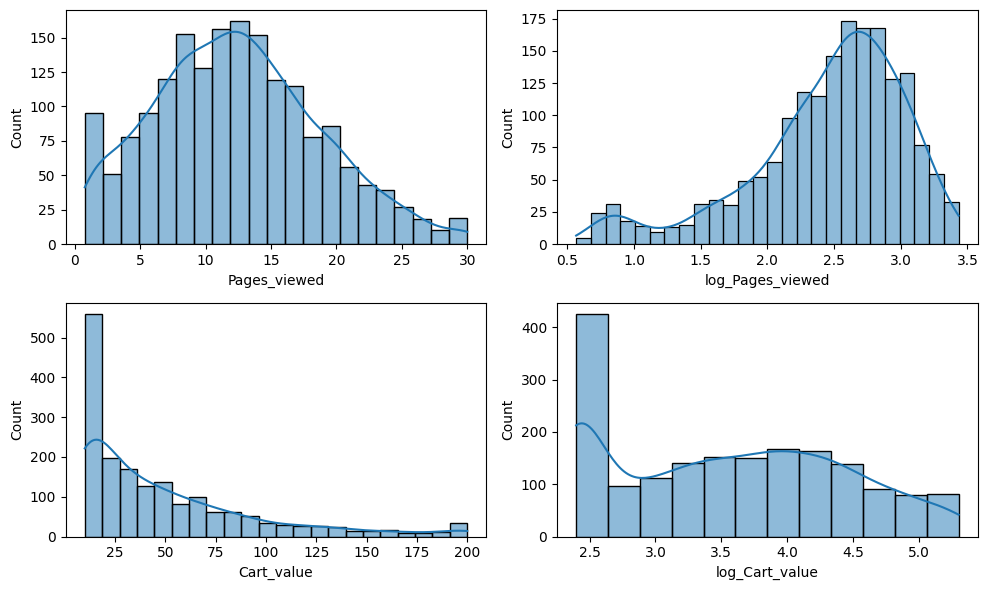

In [ ]:
# applying log transformation on right skewed columns
rs_cols = ['Pages_viewed','Cart_value']
fig,axis= plt.subplots(ncols=2,nrows=len(rs_cols),figsize=(10,3*len(rs_cols)))

for j, col in enumerate(rs_cols):
    train[f'log_{col}'] = np.log1p(train[col])

    sns.histplot(data=train,x=col,ax=axis[j][0],kde=True)

    sns.histplot(data=train,x=f'log_{col}',ax=axis[j][1],kde=True)


plt.tight_layout()
plt.show()


#for test
for col in rs_cols:
    test[f'log_{col}'] = np.log1p(test[col])

train = train.drop(columns=rs_cols)
test = test.drop(columns=rs_cols)

In [ ]:
def new_features(df):
    df['time/pages'] = df['Time_on_site']/df['log_Pages_viewed']
    df['time*pages'] = df['Time_on_site']*df['log_Pages_viewed']
    df['time+pages'] = df['Time_on_site']+df['log_Pages_viewed']
    df['ad/time'] = df['Clicked_ad']/df['Time_on_site']#
    df['ad+time'] = df['Clicked_ad']+df['Time_on_site']
    df['ad*time'] = df['Clicked_ad']*df['Time_on_site']#
    df['ad/page'] = df['Clicked_ad']/df['log_Pages_viewed']
    df['ad+page'] = df['Clicked_ad']+df['log_Pages_viewed']#
    df['ad+page+time'] = df['Clicked_ad']+df['log_Pages_viewed']+df['Time_on_site']#
    df['ad*page'] = df['Clicked_ad']*df['log_Pages_viewed']#

    return df

train = new_features(train)
test = new_features(test)

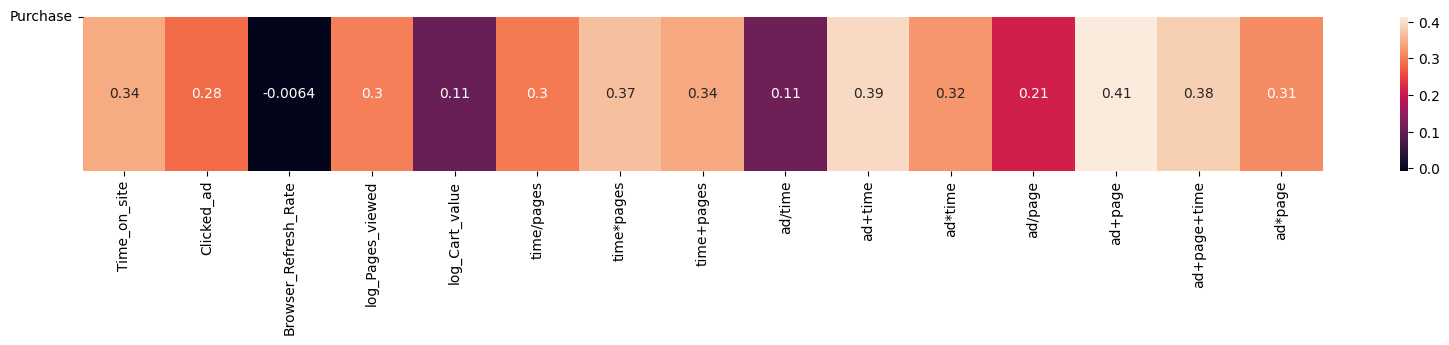

In [ ]:
# for checking if the new feature created are useful or not

corr = train.corr(numeric_only=True)
label_corr = corr['Purchase']

label_corr = label_corr.drop('Purchase').values.reshape(1, -1)

plt.figure(figsize=(20,2))
sns.heatmap(label_corr, annot=True, xticklabels=corr.columns.drop('Purchase'))
plt.yticks([0], ['Purchase'], rotation=0)  # Add label to the y-axis
plt.show()

In [ ]:
X_train = train.drop(columns=['Purchase'],axis=1)
X_test = test.drop(columns=['Purchase'],axis=1)

y_train = train['Purchase']
y_test = test['Purchase']

In [ ]:
new_num_cols = ['Time_on_site','log_Pages_viewed','log_Cart_value','Browser_Refresh_Rate']
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(drop='first',sparse_output=False)
scaler = StandardScaler()

ct = ColumnTransformer(transformers=[('encoder',encoder,cat_cols),('scaler',scaler,new_num_cols)],remainder='passthrough')

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from xgboost import XGBClassifier

models = [XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),use_label_encoder=False,eval_metric='logloss'),SVC(class_weight='balanced'),LogisticRegression(max_iter=1000,class_weight='balanced'),RandomForestClassifier(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced')]


for model in models:
    print(f'Training {model}......')
    model.fit(X_train_transformed,y_train)

    pred = model.predict(X_test_transformed)
    train_pred = model.predict(X_train_transformed)

    train_accuracy = accuracy_score(y_train,train_pred)
    accuracy = accuracy_score(y_test,pred)


    print(f'train_accuracy: {train_accuracy}')
    print(f'test_accuracy: {accuracy}')

    f1__score = f1_score(y_test,pred)
    print(f'f1_score: {f1__score}')

    print('\n')

Training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)......


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:08:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


train_accuracy: 0.9977777777777778
test_accuracy: 0.7555555555555555
f1_score: 0.6258503401360545


Training SVC(class_weight='balanced')......
train_accuracy: 0.7038888888888889
test_accuracy: 0.7111111111111111
f1_score: 0.6486486486486487


Training LogisticRegression(class_weight='balanced', max_iter=1000)......
train_accuracy: 0.7338888888888889
test_accuracy: 0.7111111111111111
f1_score: 0.6306818181818182


Training RandomForestClassifier(class_weight='balanced')......
train_accuracy: 1.0
test_accuracy: 0.7822222222222223
f1_score: 0.6201550387596899


Training DecisionTreeClassifier(class_weight='balanced')......
train_accuracy: 1.0
test_accuracy: 0.7111111111111111
f1_score: 0.5112781954887218




In [ ]:

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train_transformed,y_train)

pred = rf_clf.predict(X_test_transformed)
accuracy_score(y_test,pred)


0.7911111111111111

In [ ]:
pd.DataFrame(rf_clf.feature_importances_)

,0
0,0.010576
1,0.009355
2,0.009448
3,0.009430
4,0.007854
5,0.011462
6,0.006875
7,0.059752
8,0.084237
9,0.084678


In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', max_iter=1000)),
        ('rf', RandomForestClassifier(class_weight='balanced')),
        ('svc', SVC(probability=True, class_weight='balanced')),
        ('xgb',XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),eval_metric='logloss'))
    ],
    voting='soft'
)

ensemble.fit(X_train_transformed, y_train)
ensemble_pred = ensemble.predict(X_test_transformed)
ensemble_train_pred = ensemble.predict(X_train_transformed)
print(f'test: {accuracy_score(y_test,ensemble_pred)}')
print(f'train: {accuracy_score(y_train,ensemble_train_pred)}')
print(f'test_f1_score: {f1_score(y_test,ensemble_pred)}')

test: 0.7777777777777778
train: 0.9705555555555555
test_f1_score: 0.6575342465753424


In [ ]:
# Hyperparameter tuning
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__solver': ['liblinear', 'lbfgs'],

    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],

    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],

    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [2, 4, 6, 8],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=ensemble,
    param_distributions=param_grid,
    n_iter=25,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('lr',
                                                           LogisticRegression(class_weight='balanced',
                                                                              max_iter=1000)),
                                                          ('rf',
                                                           RandomForestClassifier(class_weight='balanced')),
                                                          ('svc',
                                                           SVC(class_weight='balanced',
                                                               probability=True)),
                                                          ('xgb',
                                                           XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         col...
                   param_distributions={'lr__C': [0.01, 0.1, 1, 10],
                                        'lr__solver': ['liblinear', 'lbfgs'],
                                        'rf__max_depth': [None, 5, 10, 20],
                                        'rf__min_samples_split': [2, 5, 10],
                                        'rf__n_estimators': [100, 200, 300],
                                        'svc__C': [0.1, 1, 10],
                                        'svc__gamma': ['scale', 'auto'],
                                        'xgb__learning_rate': [0.01, 0.05, 0.1,
                                                               0.2],
                                        'xgb__max_depth': [2, 4, 6, 8],
                                        'xgb__n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
ensemble1 = random_search.best_estimator_
ensemble1.fit(X_train_transformed, y_train)
ensemble1_pred = ensemble1.predict(X_test_transformed)
ensemble1_train_pred = ensemble1.predict(X_train_transformed)
print(f'test: {accuracy_score(y_test,ensemble1_pred)}')
print(f'train: {accuracy_score(y_train,ensemble1_train_pred)}')
print(f'test_f1_score: {f1_score(y_test,ensemble1_pred)}')


test: 0.7422222222222222
train: 0.8388888888888889
test_f1_score: 0.6419753086419753


In [ ]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint,uniform,loguniform

rf_clf = RandomForestClassifier(class_weight='balanced')
param = {
    'n_estimators':randint(50,600),
    'criterion': ['gini', 'entropy', 'log_loss'] ,
    'max_depth': randint(2,30),
    'min_samples_split': randint(2,20),
    'min_samples_leaf': randint(1,20),
    'max_features': uniform(0.1,0.9),
    'max_leaf_nodes': randint(2,20),
    'bootstrap':[True,False],
}

rs_cv = RandomizedSearchCV(estimator=rf_clf,param_distributions=param,n_iter=50,cv=5,scoring='accuracy',n_jobs=-1)
rs_cv.fit(X_train_transformed,y_train)


# grid_param = {
#     'n_estimators':[100,200,300,350,400,500],
#     'criterion': ['gini', 'entropy', 'log_loss'] ,
#     'max_depth': [2,5,8,10],
#     'min_samples_split': [2,5,8,10],
#     'min_samples_leaf':[2,5,10,15],
#     'max_features': ['sqrt','log2',None],
#     'max_leaf_nodes': [2,5,8,10],
#     'bootstrap':[True,False],
# }

# rs_cv = GridSearchCV(estimator=rf_clf,param_grid=grid_param,cv=5,scoring='accuracy')
# rs_cv.fit(X_train_transformed,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc30c314e50>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen o...
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc30c314310>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc30c315c90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc30c317b50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc30c315dd0>},
                   scoring='accuracy')

In [ ]:
rs_cv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': np.float64(0.7853125624697039),
 'max_leaf_nodes': 16,
 'min_samples_leaf': 17,
 'min_samples_split': 17,
 'n_estimators': 340}

In [ ]:
# my_model = RandomForestClassifier(class_weight='balanced',bootstrap=False,criterion='gini',max_depth=15,max_features=0.45144182848657566,max_leaf_nodes=2,min_samples_split=5,n_estimators=200,min_samples_leaf=2)
my_model = rs_cv.best_estimator_
my_model.fit(X_train_transformed,y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14,
                       max_features=np.float64(0.7853125624697039),
                       max_leaf_nodes=16, min_samples_leaf=17,
                       min_samples_split=17, n_estimators=340)

In [ ]:
my_pred = my_model.predict(X_test_transformed)
my_pred_train = my_model.predict(X_train_transformed)


print(f'train_accuracy: {accuracy_score(y_train,my_pred_train)}')
print(f'accuracy: {accuracy_score(y_test,my_pred)}')
print(f'f1_score: {f1_score(y_test,my_pred)}')


train_accuracy: 0.7638888888888888
accuracy: 0.7333333333333333
f1_score: 0.653179190751445


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,my_pred)

array([[217,  97],
       [ 23, 113]])

In [ ]:
from scipy.stats import randint,uniform,loguniform
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': loguniform(1e-4, 1e2),   # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],  # 'lbfgs' doesn't support l1
    'l1_ratio': uniform(0, 1),  # Only used when penalty is 'elasticnet'
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 5000],
}

lr_model = LogisticRegression(class_weight='balanced')
lr_rs = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1)

lr_rs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dc29495a010>,
                                        'fit_intercept': [True, False],
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dc299870550>,
                                        'max_iter': [1000, 2000, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   scoring='accuracy', verbose=1)

In [ ]:
lr_rs.best_params_

{'C': np.float64(0.01110077935020272),
 'fit_intercept': True,
 'l1_ratio': np.float64(0.10901906686893681),
 'max_iter': 5000,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [ ]:
my_model1 = lr_rs.best_estimator_
my_pred1 = my_model1.predict(X_test_transformed)
my_pred_train1 = my_model1.predict(X_train_transformed)


print(f'train_accuracy: {accuracy_score(y_train,my_pred_train1)}')
print(f'accuracy: {accuracy_score(y_test,my_pred1)}')
print(f'f1_score: {f1_score(y_test,my_pred1)}')

train_accuracy: 0.7411111111111112
accuracy: 0.7533333333333333
f1_score: 0.6542056074766355


In [ ]:
import tensorflow as tf

In [ ]:
ann_model = tf.keras.Sequential()
ann_model.add(tf.keras.layers.Input(shape=[21,]))
ann_model.add(tf.keras.layers.Dense(64, activation="relu"))
ann_model.add(tf.keras.layers.Dense(32, activation="relu"))
ann_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

ann_model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



In [ ]:
ann_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train_transformed.shape

(1800, 21)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = ann_model.fit(X_train_transformed, y_train, epochs=200, validation_split=0.2,callbacks=early_stop)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6567 - loss: 1.0086 - val_accuracy: 0.7278 - val_loss: 0.5775
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7553 - loss: 0.4954 - val_accuracy: 0.7278 - val_loss: 0.5560
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7509 - loss: 0.4828 - val_accuracy: 0.6639 - val_loss: 0.5706
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7769 - loss: 0.4774 - val_accuracy: 0.7278 - val_loss: 0.5288
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7819 - loss: 0.4440 - val_accuracy: 0.7333 - val_loss: 0.5670
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7441 - loss: 0.4900 - val_accuracy: 0.7333 - val_loss: 0.5363
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7424 - loss: 0.4721 - val_accuracy: 0.7278 - val_loss: 0.5462
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7807 - loss: 0.4580 - val_accuracy: 0.7

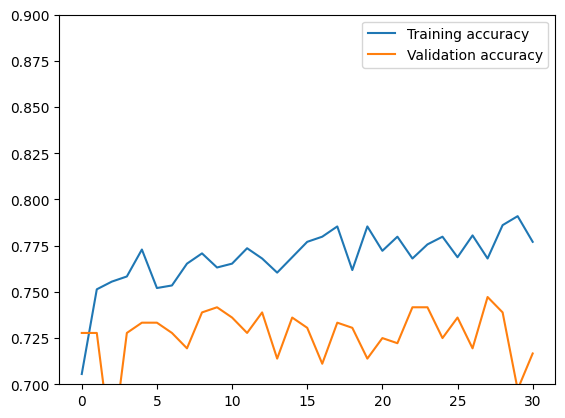

In [ ]:
# history.history
plt.ylim(0.70,0.90)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
ann_model.fit(X_train_transformed, y_train, epochs=20,callbacks=early_stop)

In [ ]:
ann_pred = ann_model.predict(X_test_transformed)
ann_pred = np.where(ann_pred>0.5,1,0)
accuracy_score(y_test,ann_pred)